In [1]:
import numpy as np
import torch
import networkx as nx
import difflib
import matplotlib.pyplot as plt
import matplotlib
from math import *

# Vary k

## Generate data

In [2]:
N = 100
M = 100
ks = np.round(np.linspace(5, 50, 10))
Rs = np.linspace(0, M, 11)[1:]


def y_seq_ones(comb_on, M):
    return np.random.choice(np.arange(M), size= comb_on, replace = False)
# Create input data
x_np = np.array([[1 if i ==j else 0 for i in range(N)] for j in range(N)])
x = torch.tensor(x_np).float()

In [6]:
N = 100 

beh_1_all = []
#count = 3
for it_ind in range(5):
    learning_rate = 1e0

    beh_learnt_all = []
    for k_ind, k in enumerate(ks):
        print(M)
        k = int(k)
        beh_k = []
        y_ones_all = [y_seq_ones(k, M) for i in range(N)]
        y_np = np.array([tuple([1 if i in y_ones_all[j] else 0 for i in range(M)]) for j in range(N)])
        y = torch.tensor(y_np).float()
        epochs = int(1e5)
        for R_ind, R in enumerate(Rs):
            R = int(R)
            print(R_ind)
            model = torch.nn.Sequential(
              torch.nn.Linear(N, R),
              torch.nn.Sigmoid(),
              torch.nn.Linear(R,M),
              torch.nn.Sigmoid())
            loss_fn = torch.nn.MSELoss()
            optimizer = torch.optim.SGD(model.parameters(), 
                                        lr=learning_rate, momentum=0.9)
            for t in range(epochs):
                # Run the forward pass
                y_pred = model(x)
                # Calculate the loss
                loss = loss_fn(y_pred, y)
                # Zero the gradients before running the backward pass.
                optimizer.zero_grad()
                # Backward pass
                loss.backward()
                # Update weights using SGD
                optimizer.step()
            torch.save(model.state_dict(), '../Fig2c/k_var_models/k{}_R{}_it{}'.format(k_ind, R_ind, it_ind))
#             # retrieve later
#             the_model = TheModelClass(*args, **kwargs)
#             the_model.load_state_dict(torch.load(PATH))
            per = 0.99
            threshold = 0.5
            behaviour = 0
            behaviours_learnt = []
            y_pred_binary = np.abs(np.round(y_pred.data.numpy()+0.5-threshold))
            for j in range(len(y)):
                s = difflib.SequenceMatcher(None, y.data.numpy()[j],y_pred_binary[j])
                if s.ratio() > per:
                    behaviour += 1
            beh_k.append(behaviour/N)
        beh_learnt_all.append(beh_k)
    beh_1_all.append(beh_learnt_all)

100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5
6
7
8
9
100
0
1
2
3
4
5


In [5]:
for beh in beh_1_all:
    beh_k_var.append(beh)

In [7]:
beh_k_var_all_avg = []
beh_k_var_all_std = []

for beh_ind in range(len(ks)):
    print(beh_ind)
    b_all = np.array([b_set[beh_ind] for b_set in beh_k_var[:]])
    b_avg = [np.mean(b_ele) for b_ele in b_all.T]
    b_std = [np.std(b_ele) for b_ele in b_all.T]
    beh_k_var_all_avg.append(b_avg)
    beh_k_var_all_std.append(b_std)

0
1
2
3
4
5
6
7
8
9


## Save data and plot

In [ ]:
np.savetxt("beh_k_var_all_avg.csv", beh_k_var_all_avg, delimiter=",")
np.savetxt("beh_k_var_all_std.csv", beh_k_var_all_std, delimiter=",")

In [4]:
beh_k_var_all_avg = np.genfromtxt('beh_k_var_all_avg.csv', delimiter=',')
beh_k_var_all_std = np.genfromtxt('beh_k_var_all_std.csv', delimiter=',')

In [5]:
import seaborn as sns
sns.set_palette("coolwarm", 10)

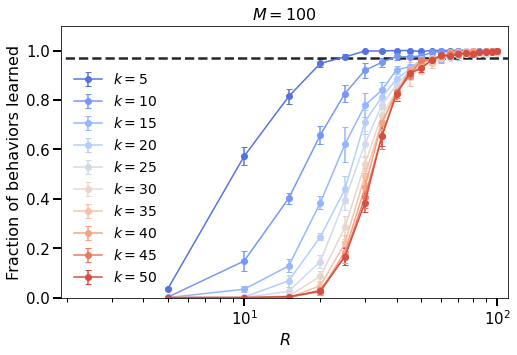

In [6]:
plt.figure(figsize=(8,5))
for km_ind in range(0, len(ks)):
    plt.errorbar(np.linspace(0,100, 21)[1:], np.array(beh_k_var_all_avg[km_ind])[:],
              yerr = beh_k_var_all_std[km_ind][:], capsize=3, label = '$k = {}$'.format(int(ks[km_ind])), 
                  marker ='o')
plt.plot(np.linspace(0, 250, 50), 0.97*np.ones(50), '--', color = 'black', linewidth = 2.5, alpha = 0.85)
plt.xlabel('$ R $', fontsize=16)
plt.ylabel('Fraction of behaviors learned', fontsize=16)
plt.tick_params(labelsize=15)
plt.legend(fontsize=14, frameon = False)
plt.title('$M = 100$', fontsize=16)
plt.xlim([1.9, 10**2*1.1])
# plt.xticks([0, 0.5, 1, 1.5, 2], labels = ['$10^0$', '$10^{0.5}$', '$10^{1}$', '$10^{1.5}$', '$10^{2}$'])
plt.ylim([0, 1.1])
plt.xscale('log', basex = 10)
plt.tick_params(axis="y",direction="out")
plt.tick_params(axis="x",direction="out")
plt.tick_params('both', length=8, width=2, which='major')
plt.tick_params('both', length=4, width=1, which='minor')
plt.savefig('kvar.pdf')
plt.show()